Onze imports komen hieronder.

In [116]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

Het inlezen van de data.

In [117]:
dataframe = pd.read_csv('admissions20152016_clean_all.csv')
dataframe.head()

Unnamed: 0              adm_icu  adm_time_icu         dis_date_icu  \
0           1  2015-01-01 07:36:00      0.316667  2015-01-02 16:43:00   
1           2  2015-01-01 14:23:59      0.600000  2015-01-01 19:47:00   
2           3  2015-01-01 20:30:59      0.854861  2015-01-02 19:09:59   
3           4  2015-01-02 12:56:00      0.538889  2015-01-03 11:32:00   
4           5  2015-01-02 13:12:00      0.550000  2015-01-03 10:02:59   

   dis_time_icu  plan_adm  ref_spec  
0      0.696528       0.0        12  
1      0.824306       0.0        41  
2      0.798611       0.0         7  
3      0.480556       1.0        29  
4      0.418750       0.0        12

We verwijderen nu de kolommen die voor ons niet belangrijk zijn.

In [118]:
dataframe = dataframe.drop(columns=["adm_time_icu","dis_time_icu"])
dataframe.head()

Unnamed: 0              adm_icu         dis_date_icu  plan_adm  ref_spec
0           1  2015-01-01 07:36:00  2015-01-02 16:43:00       0.0        12
1           2  2015-01-01 14:23:59  2015-01-01 19:47:00       0.0        41
2           3  2015-01-01 20:30:59  2015-01-02 19:09:59       0.0         7
3           4  2015-01-02 12:56:00  2015-01-03 11:32:00       1.0        29
4           5  2015-01-02 13:12:00  2015-01-03 10:02:59       0.0        12

De kolom `ref_spec` bestaat uit numerieke waarden die staan voor bepaalde afdelingen. Met de code hieronder zetten we deze getallen om naar de bijbehorende afdelingen.

In [119]:
dataframe['ref_spec'] = dataframe['ref_spec'].map(
    {
        12:'NEC',
        2:'INT',
        4:'INT',
        7:'INT',
        41:'INT',
        47:'INT',
        3:'CARD',
        9:'CHIR',
        10:'CHIR',
        11:'CHIR',
        13:'CHIR',
        39:'CHIR',
        15:'OTHER',
        18:'OTHER',
        19:'OTHER',
        20:'OTHER',
        23:'OTHER',
        36:'OTHER',
        48:'OTHER',
        98:'OTHER',
        21:'NEU',
        29:'CAPU',
        50:'CAPU',
    }
)
dataframe.rename(columns = {'ref_spec' : 'afdeling'}, inplace = True)
dataframe.head()

Unnamed: 0              adm_icu         dis_date_icu  plan_adm afdeling
0           1  2015-01-01 07:36:00  2015-01-02 16:43:00       0.0      NEC
1           2  2015-01-01 14:23:59  2015-01-01 19:47:00       0.0      INT
2           3  2015-01-01 20:30:59  2015-01-02 19:09:59       0.0      INT
3           4  2015-01-02 12:56:00  2015-01-03 11:32:00       1.0     CAPU
4           5  2015-01-02 13:12:00  2015-01-03 10:02:59       0.0      NEC

De kolom `plan_adm` bevat numerieke waarden die betekenen of de opname wel of niet gepland was. Deze data zetten we om naar boolean values True of False.

In [120]:
dataframe['plan_adm'] = dataframe['plan_adm'].map(
    {
        0:False,
        1:True
})
dataframe.rename(columns = {'plan_adm' : 'planned'}, inplace = True)
dataframe.head()

Unnamed: 0              adm_icu         dis_date_icu planned afdeling
0           1  2015-01-01 07:36:00  2015-01-02 16:43:00   False      NEC
1           2  2015-01-01 14:23:59  2015-01-01 19:47:00   False      INT
2           3  2015-01-01 20:30:59  2015-01-02 19:09:59   False      INT
3           4  2015-01-02 12:56:00  2015-01-03 11:32:00    True     CAPU
4           5  2015-01-02 13:12:00  2015-01-03 10:02:59   False      NEC

Nu printen we uit hoeveel opnames er waren per afdeling.

In [121]:
dataframe["afdeling"].value_counts()

CAPU     1477
INT      1134
CHIR      637
NEU       501
NEC       379
CARD      349
OTHER      58
Name: afdeling, dtype: int64

We gaan een nieuwe kolom `sub_ic` maken die een numerieke waarde bevat van 1 tot en met 4. Deze waarde correspondeert met de subafdeling waar alle afdelingen van de kolom `afdeling` onder vallen. Deze kolom gebruiken we later weer om deze verdeling op zich te visualizeren.

In [122]:
dataframe['sub_ic'] = dataframe['afdeling'].map(
    {
        'CAPU':1,

        'CARD':2,
        'INT':2,
        'OTHER':2,

        'CHIR':3,

        'NEC':4,
        'NEU':4,
        

    }
)
dataframe.head()

Unnamed: 0              adm_icu         dis_date_icu planned afdeling  \
0           1  2015-01-01 07:36:00  2015-01-02 16:43:00   False      NEC   
1           2  2015-01-01 14:23:59  2015-01-01 19:47:00   False      INT   
2           3  2015-01-01 20:30:59  2015-01-02 19:09:59   False      INT   
3           4  2015-01-02 12:56:00  2015-01-03 11:32:00    True     CAPU   
4           5  2015-01-02 13:12:00  2015-01-03 10:02:59   False      NEC   

   sub_ic  
0       4  
1       2  
2       2  
3       1  
4       4

Ook voegen we een kolom toe die de betekenis van de getallen in kolom `sub_ic` bevat.

In [123]:
dataframe['sub_ic_text'] = dataframe['sub_ic'].map(
    {
        1:'CAPU',

        2:'CARD/INT/OTHER',

        3:'CHIR',

        4:'NEC/NEU',
    }
)
dataframe.head()

Unnamed: 0              adm_icu         dis_date_icu planned afdeling  \
0           1  2015-01-01 07:36:00  2015-01-02 16:43:00   False      NEC   
1           2  2015-01-01 14:23:59  2015-01-01 19:47:00   False      INT   
2           3  2015-01-01 20:30:59  2015-01-02 19:09:59   False      INT   
3           4  2015-01-02 12:56:00  2015-01-03 11:32:00    True     CAPU   
4           5  2015-01-02 13:12:00  2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text  
0       4         NEC/NEU  
1       2  CARD/INT/OTHER  
2       2  CARD/INT/OTHER  
3       1            CAPU  
4       4         NEC/NEU

De waardes in de kolommen `adm_icu` en `dis_date_icu` zijn nu gewoon strings. Met de code hieronder zetten we ze om naar datatime values, zodat we losse delen van deze values, zoals bijvoorbeeld het uur, later makkelijker kunnen ophalen.

In [124]:
dataframe["adm_icu"] = pd.to_datetime(dataframe["adm_icu"], format='%Y/%m/%d %H:%M')
dataframe["dis_date_icu"] = pd.to_datetime(dataframe["dis_date_icu"], format='%Y/%m/%d %H:%M')
dataframe.head()

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0           1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1           2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2           3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3           4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4           5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text  
0       4         NEC/NEU  
1       2  CARD/INT/OTHER  
2       2  CARD/INT/OTHER  
3       1            CAPU  
4       4         NEC/NEU

Nu voegen we de kolom `in_hosp` toe. Deze kolom bevat de duur van het verblijf. Omdat we zojuist de tijden hebben omgezet naar datetime waardes, kunnen we deze waardes simpelweg van elkaar aftrekken.

In [125]:
dataframe["in_hosp"] = dataframe["dis_date_icu"] - dataframe["adm_icu"]
dataframe.head()

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0           1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1           2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2           3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3           4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4           5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text         in_hosp  
0       4         NEC/NEU 1 days 09:07:00  
1       2  CARD/INT/OTHER 0 days 05:23:01  
2       2  CARD/INT/OTHER 0 days 22:39:00  
3       1            CAPU 0 days 22:36:00  
4       4         NEC/NEU 0 days 20:50:59

Ook voegen we een kolom toe die de verblijfsduur bevat als een float. Dit is de verblijfsduur in uren.

In [126]:
dataframe["in_hosp_hr"] = dataframe["in_hosp"].dt.total_seconds() / 3600
dataframe.head()

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0           1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1           2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2           3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3           4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4           5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text         in_hosp  in_hosp_hr  
0       4         NEC/NEU 1 days 09:07:00   33.116667  
1       2  CARD/INT/OTHER 0 days 05:23:01    5.383611  
2       2  CARD/INT/OTHER 0 days 22:39:00   22.650000  
3       1            CAPU 0 days 22:36:00   22.600000  
4       4         NEC/NEU 0 days 20:50:59   20.849722

We kunnen nu makkelijk controleren of er incorrecte rijen in de data zitten met een negatieve verblijfsduur.

In [127]:
dataframe[dataframe["in_hosp_hr"] < 0]

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
1425        1426 2015-10-26 03:20:00 2015-10-16 00:00:00   False      INT   
1426        1427 2015-10-26 03:20:00 2015-10-16 14:44:00   False      INT   
1444        1445 2015-10-28 15:40:00 2015-10-19 00:00:00    True     CAPU   
1445        1446 2015-10-28 15:40:00 2015-10-19 18:45:59    True     CAPU   
1448        1449 2015-10-29 01:18:59 2015-10-29 00:00:00   False     CHIR   
...          ...                 ...                 ...     ...      ...   
4466        4467 2016-12-16 01:34:59 2016-12-16 00:00:00   False      INT   
4467        4468 2016-12-16 02:32:00 2016-12-16 00:00:00   False     CARD   
4489        4490 2016-12-20 20:08:00 2016-01-21 16:09:59   False      NEU   
4525        4526 2016-12-30 02:19:00 2016-12-30 00:00:00   False      NEU   
4530        4531 2016-12-30 18:24:00 2016-12-30 00:00:00   False      INT   

      sub_ic     sub_ic_text             in_hosp   in_hosp_hr  
1425       2  CARD/INT/OTHER  -11 days +20:40:00  -243.333333  
1426       2  CARD/INT/OTHER  -10 days +11:24:00  -228.600000  
1444       1            CAPU  -10 days +08:20:00  -231.666667  
1445       1            CAPU   -9 days +03:05:59  -212.900278  
1448       3            CHIR   -1 days +22:41:01    -1.316389  
...      ...             ...                 ...          ...  
4466       2  CARD/INT/OTHER   -1 days +22:25:01    -1.583056  
4467       2  CARD/INT/OTHER   -1 days +21:28:00    -2.533333  
4489       4         NEC/NEU -335 days +20:01:59 -8019.966944  
4525       4         NEC/NEU   -1 days +21:41:00    -2.316667  
4530       2  CARD/INT/OTHER   -1 days +05:36:00   -18.400000  

[333 rows x 9 columns]

We hebben de rijen met de incorrecte verblijfsduur niet nodig, dus we maken een nieuw dataframe aan met alleen de correcte rijen er in.

In [128]:
cleaned_dataframe = dataframe[dataframe["in_hosp_hr"] > 0]
cleaned_dataframe.head()

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0           1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1           2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2           3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3           4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4           5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text         in_hosp  in_hosp_hr  
0       4         NEC/NEU 1 days 09:07:00   33.116667  
1       2  CARD/INT/OTHER 0 days 05:23:01    5.383611  
2       2  CARD/INT/OTHER 0 days 22:39:00   22.650000  
3       1            CAPU 0 days 22:36:00   22.600000  
4       4         NEC/NEU 0 days 20:50:59   20.849722

## Toevoegen weghalen dubbele data

We willen nu de data checken voor eventuele dubbele waarden, zoals we hieronder zien kunnen we de kolom `Unnamed: 0` als unieke waardes bij het filteren.

In [129]:
cleaned_dataframe["Unnamed: 0"].describe()

count    4200.000000
mean     2220.946667
std      1325.196911
min         1.000000
25%      1050.750000
50%      2205.500000
75%      3372.250000
max      4535.000000
Name: Unnamed: 0, dtype: float64

In [130]:
#dis_date_icu, planned en afdeling
for num, adm, dis, plan, afd in zip(cleaned_dataframe["Unnamed: 0"], cleaned_dataframe.adm_icu, cleaned_dataframe.dis_date_icu, cleaned_dataframe.planned, cleaned_dataframe.afdeling):
    for num2, adm2, dis2, plan2, afd2 in zip(cleaned_dataframe["Unnamed: 0"], cleaned_dataframe.adm_icu, cleaned_dataframe.dis_date_icu, cleaned_dataframe.planned, cleaned_dataframe.afdeling):
        if (num != num2) and (adm == adm2) and (plan == plan2) and (dis == dis2) and (afd == afd2):
            cleaned_dataframe.drop(cleaned_dataframe.loc[cleaned_dataframe["Unnamed: 0"]==num2].index, inplace=True)

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\3711885669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataframe.drop(cleaned_dataframe.loc[cleaned_dataframe["Unnamed: 0"]==num2].index, inplace=True)


In [131]:
cleaned_dataframe

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0              1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1              2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2              3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3              4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4              5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
4529        4530 2016-12-30 16:47:00 2017-01-10 00:00:00   False      NEC   
4531        4532 2016-12-30 18:42:59 2016-12-31 00:00:00    True     CAPU   
4532        4533 2016-12-30 23:19:00 2017-01-01 00:00:00   False      NEC   
4533        4534 2016-12-31 15:29:59 2017-01-01 00:00:00   False      INT   
4534        4535 2016-12-31 16:07:59 2017-01-02 00:00:00   False      NEU   

      sub_ic     sub_ic_text          in_hosp  in_hosp_hr  
0          4         NEC/NEU  1 days 09:07:00   33.116667  
1          2  CARD/INT/OTHER  0 days 05:23:01    5.383611  
2          2  CARD/INT/OTHER  0 days 22:39:00   22.650000  
3          1            CAPU  0 days 22:36:00   22.600000  
4          4         NEC/NEU  0 days 20:50:59   20.849722  
...      ...             ...              ...         ...  
4529       4         NEC/NEU 10 days 07:13:00  247.216667  
4531       1            CAPU  0 days 05:17:01    5.283611  
4532       4         NEC/NEU  1 days 00:41:00   24.683333  
4533       2  CARD/INT/OTHER  0 days 08:30:01    8.500278  
4534       4         NEC/NEU  1 days 07:52:01   31.866944  

[3460 rows x 9 columns]

In [132]:
cleaned_dataframe.to_csv("cleaned_admissions.csv")

In [133]:
cleaned_dataframe['adm_icu'].describe()

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\2884521304.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cleaned_dataframe['adm_icu'].describe()


count                    3460
unique                   3447
top       2015-02-25 16:30:00
freq                        2
first     2015-01-01 07:36:00
last      2016-12-31 16:07:59
Name: adm_icu, dtype: object

De plot hieronder visualizeert het aantal patiënten per IC categorie

Text(0, 0.5, 'Aantal Patiënten')

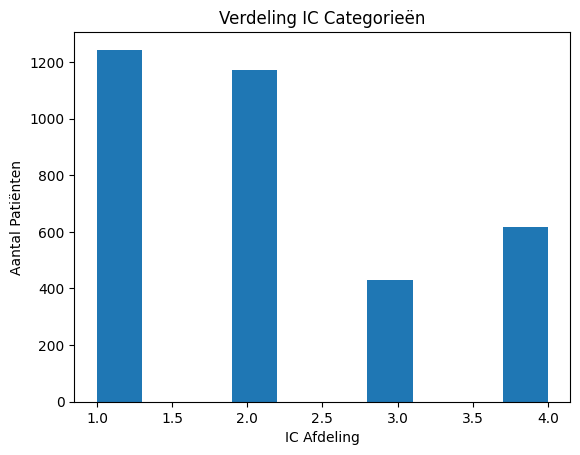

In [134]:
hist_sub_ic = cleaned_dataframe.hist(column = "sub_ic", grid=False)
pl.title("Verdeling IC Categorieën")
pl.xlabel("IC Afdeling")
pl.ylabel("Aantal Patiënten")

In [135]:
cleaned_dataframe["sub_ic"].value_counts()

1    1243
2    1170
4     617
3     430
Name: sub_ic, dtype: int64

Dit volgende plot laat de verdeling tussen geplande en ongeplande patiënten zien.

<AxesSubplot: >

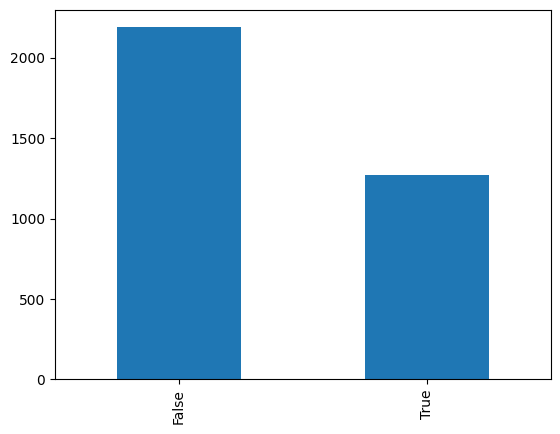

In [136]:
cleaned_dataframe["planned"].value_counts().plot(kind="bar")

In [137]:
cleaned_dataframe["planned"].value_counts()


False    2188
True     1271
Name: planned, dtype: int64

In [138]:
df = cleaned_dataframe.groupby(["sub_ic", "planned"]).size()
df = df.unstack()
df.plot(kind="bar")

<AxesSubplot: xlabel='sub_ic'>

<AxesSubplot: xlabel='afdeling'>

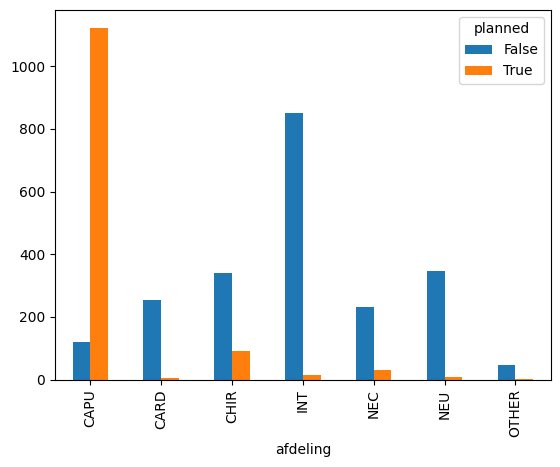

In [139]:
df = cleaned_dataframe.groupby(["afdeling", "planned"]).size()
df = df.unstack()
df.plot(kind="bar")

We willen nu een kolom aan het dataframe toevoegen met daarin het uur van de dag van de admission. Hiermee werken we dan later verder.

In [140]:
cleaned_dataframe["adm_icu"].describe(datetime_is_numeric=True)

count                             3460
mean     2016-01-14 21:39:37.484392960
min                2015-01-01 07:36:00
25%                2015-06-20 01:30:14
50%         2016-02-23 14:38:59.500000
75%      2016-07-26 08:10:59.249999872
max                2016-12-31 16:07:59
Name: adm_icu, dtype: object

In [141]:
cleaned_dataframe["starthour"] = cleaned_dataframe["adm_icu"].dt.hour

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\589217427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataframe["starthour"] = cleaned_dataframe["adm_icu"].dt.hour


In [142]:
cleaned_dataframe["starthour"].describe()

count    3460.000000
mean       13.897399
std         5.750688
min         0.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        23.000000
Name: starthour, dtype: float64

Text(0, 0.5, 'Aantal Patiënten')

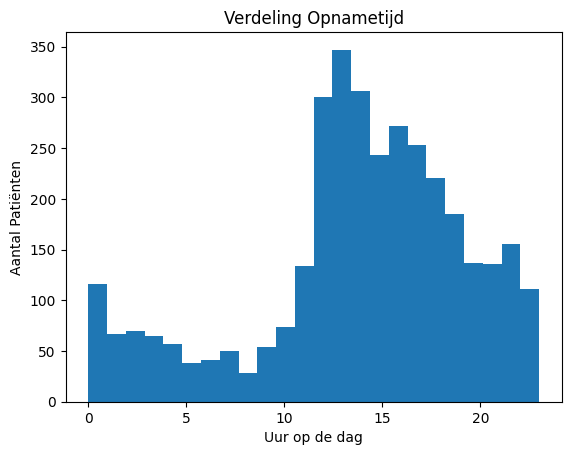

In [143]:
hist_start_hour = cleaned_dataframe.hist(column = "starthour", grid=False, bins=24)
pl.title("Verdeling Opnametijd")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

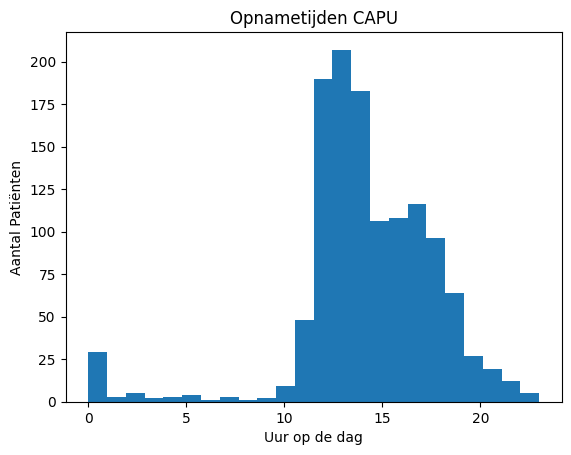

In [144]:
cleaned_dataframe[cleaned_dataframe.afdeling=="CAPU"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden CAPU")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

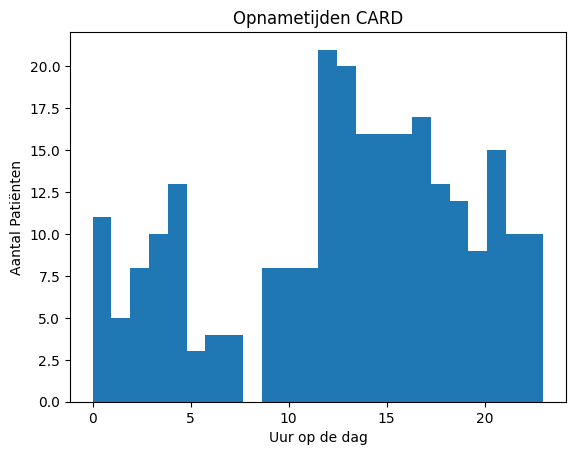

In [145]:
cleaned_dataframe[cleaned_dataframe.afdeling=="CARD"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden CARD")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

In [146]:
cleaned_dataframe[cleaned_dataframe.afdeling=="CHIR"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden CHIR")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

Text(0, 0.5, 'Aantal Patiënten')

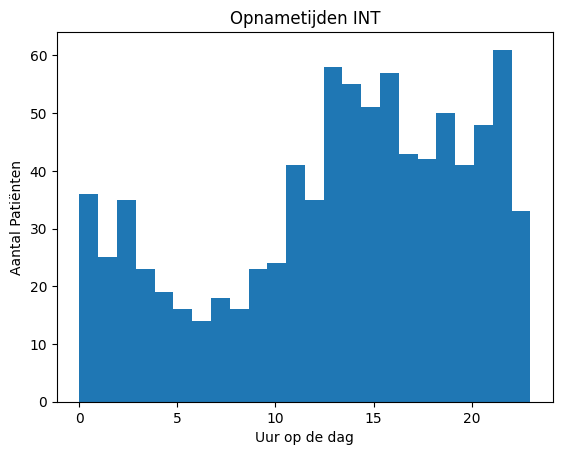

In [147]:
cleaned_dataframe[cleaned_dataframe.afdeling=="INT"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden INT")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

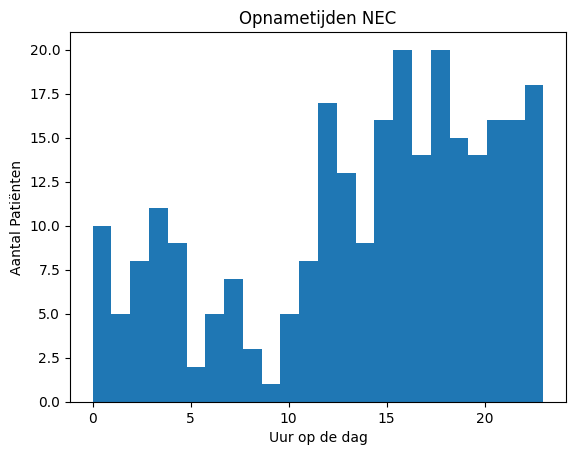

In [148]:
cleaned_dataframe[cleaned_dataframe.afdeling=="NEC"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden NEC")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

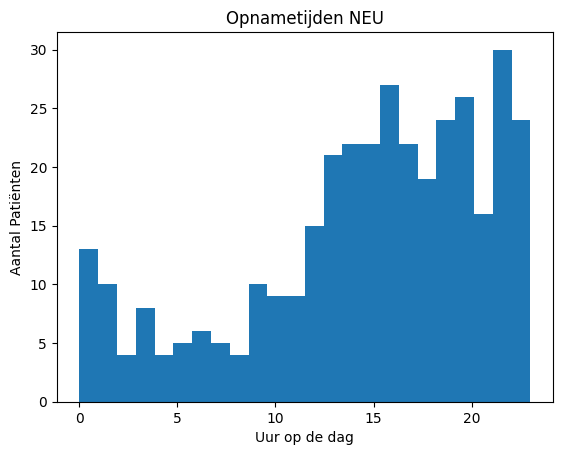

In [149]:
cleaned_dataframe[cleaned_dataframe.afdeling=="NEU"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden NEU")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

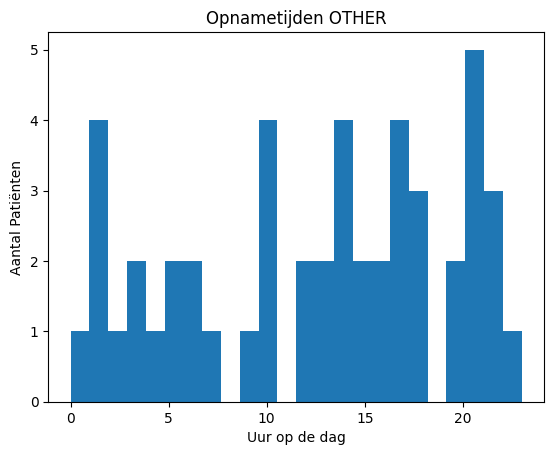

In [150]:
cleaned_dataframe[cleaned_dataframe.afdeling=="OTHER"].hist(column = "starthour", grid=False, bins=24)
pl.title("Opnametijden OTHER")
pl.xlabel("Uur op de dag")
pl.ylabel("Aantal Patiënten")

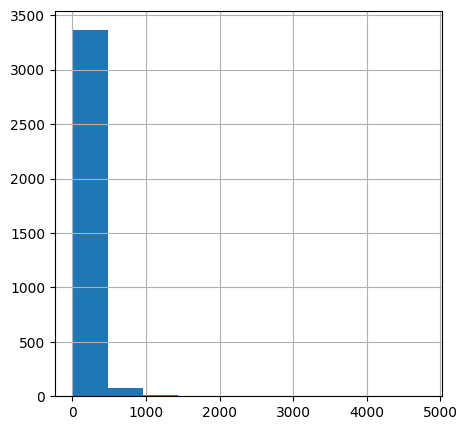

In [151]:
cleaned_dataframe['in_hosp_hr'].hist(figsize=(5,5), bins = 10)
plt.show()

In [152]:
lst = []
for i in cleaned_dataframe['in_hosp_hr']:
    if i < 850:
        lst.append(i)

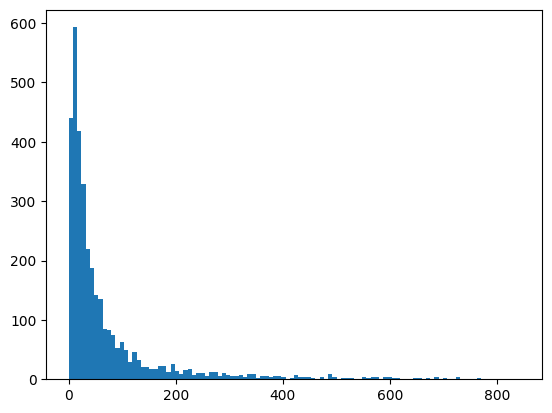

In [153]:
plt.hist(x=lst, bins=850//8) #850 // 8 = 106
plt.show()

In [154]:
cleaned_dataframe['geweigerd'] = False
cleaned_dataframe

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\2935520212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_dataframe['geweigerd'] = False


Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0              1 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1              2 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2              3 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3              4 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4              5 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
4529        4530 2016-12-30 16:47:00 2017-01-10 00:00:00   False      NEC   
4531        4532 2016-12-30 18:42:59 2016-12-31 00:00:00    True     CAPU   
4532        4533 2016-12-30 23:19:00 2017-01-01 00:00:00   False      NEC   
4533        4534 2016-12-31 15:29:59 2017-01-01 00:00:00   False      INT   
4534        4535 2016-12-31 16:07:59 2017-01-02 00:00:00   False      NEU   

      sub_ic     sub_ic_text          in_hosp  in_hosp_hr  starthour  \
0          4         NEC/NEU  1 days 09:07:00   33.116667          7   
1          2  CARD/INT/OTHER  0 days 05:23:01    5.383611         14   
2          2  CARD/INT/OTHER  0 days 22:39:00   22.650000         20   
3          1            CAPU  0 days 22:36:00   22.600000         12   
4          4         NEC/NEU  0 days 20:50:59   20.849722         13   
...      ...             ...              ...         ...        ...   
4529       4         NEC/NEU 10 days 07:13:00  247.216667         16   
4531       1            CAPU  0 days 05:17:01    5.283611         18   
4532       4         NEC/NEU  1 days 00:41:00   24.683333         23   
4533       2  CARD/INT/OTHER  0 days 08:30:01    8.500278         15   
4534       4         NEC/NEU  1 days 07:52:01   31.866944         16   

      geweigerd  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
4529      False  
4531      False  
4532      False  
4533      False  
4534      False  

[3460 rows x 11 columns]

In [155]:
geweigerd_df = pd.read_csv('geweigerde_pat.csv', sep=';')
geweigerd_df['datum'] = pd.to_datetime(geweigerd_df['datum'], errors='coerce', dayfirst = False)
geweigerd_df.rename(columns = {'datum' : 'adm_icu'}, inplace = True)
geweigerd_df.rename(columns = {'Verw_specialisme' : 'afdeling'}, inplace = True)

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\1106407508.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  geweigerd_df['datum'] = pd.to_datetime(geweigerd_df['datum'], errors='coerce', dayfirst = False)


In [156]:
geweigerd_df['geweigerd'] = True
geweigerd_df["planned"] = False
geweigerd_df

adm_icu afdeling  geweigerd  planned
0   2015-01-27      INT       True    False
1   2015-01-27      NEC       True    False
2   2015-02-02   Overig       True    False
3   2015-09-02      NEC       True    False
4   2015-10-02      INT       True    False
..         ...      ...        ...      ...
350 2017-01-06      NEU       True    False
351 2017-01-06      NEU       True    False
352 2017-03-06      NEC       True    False
353 2017-05-06      NaN       True    False
354 2017-07-06      NEC       True    False

[355 rows x 4 columns]

In [157]:
df3 = cleaned_dataframe.append(geweigerd_df, ignore_index=True)
df3

C:\Users\Eray\AppData\Local\Temp\ipykernel_3476\2930658817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = cleaned_dataframe.append(geweigerd_df, ignore_index=True)


Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0            1.0 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1            2.0 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2            3.0 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3            4.0 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4            5.0 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
3810         NaN 2017-01-06 00:00:00                 NaT   False      NEU   
3811         NaN 2017-01-06 00:00:00                 NaT   False      NEU   
3812         NaN 2017-03-06 00:00:00                 NaT   False      NEC   
3813         NaN 2017-05-06 00:00:00                 NaT   False      NaN   
3814         NaN 2017-07-06 00:00:00                 NaT   False      NEC   

      sub_ic     sub_ic_text         in_hosp  in_hosp_hr  starthour  geweigerd  
0        4.0         NEC/NEU 1 days 09:07:00   33.116667        7.0      False  
1        2.0  CARD/INT/OTHER 0 days 05:23:01    5.383611       14.0      False  
2        2.0  CARD/INT/OTHER 0 days 22:39:00   22.650000       20.0      False  
3        1.0            CAPU 0 days 22:36:00   22.600000       12.0      False  
4        4.0         NEC/NEU 0 days 20:50:59   20.849722       13.0      False  
...      ...             ...             ...         ...        ...        ...  
3810     NaN             NaN             NaT         NaN        NaN       True  
3811     NaN             NaN             NaT         NaN        NaN       True  
3812     NaN             NaN             NaT         NaN        NaN       True  
3813     NaN             NaN             NaT         NaN        NaN       True  
3814     NaN             NaN             NaT         NaN        NaN       True  

[3815 rows x 11 columns]

In [158]:
cleaned_dataframe['in_hosp_hr'].describe()

count    3460.000000
mean       79.908223
std       181.396081
min         0.033611
25%        11.812569
50%        30.533611
75%        75.862500
max      4786.983611
Name: in_hosp_hr, dtype: float64

## Kansverdeling
Voor het maken van het model moeten wij een kansverdeling maken die de verdeling van de waardes geeft, om zo een beter model te maken. We willen de verdeling maken van de weekdagen, om zo te kunnen voorspellen op welke dag van de week we meer patiënten kunnen verwachten, en van welke afdeling ze komen. Ook willen we goed kunnen voorspellen hoelang de patiënten op de IC zullen blijven.

Allereerst willen we de data kunnen grouperen door een kolom toe te voegen met hierin de dag van de week dat ze aankwamen.

In [159]:
df3["weekday_name"] = df3['adm_icu'].dt.day_name()
df3

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0            1.0 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1            2.0 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2            3.0 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3            4.0 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4            5.0 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
3810         NaN 2017-01-06 00:00:00                 NaT   False      NEU   
3811         NaN 2017-01-06 00:00:00                 NaT   False      NEU   
3812         NaN 2017-03-06 00:00:00                 NaT   False      NEC   
3813         NaN 2017-05-06 00:00:00                 NaT   False      NaN   
3814         NaN 2017-07-06 00:00:00                 NaT   False      NEC   

      sub_ic     sub_ic_text         in_hosp  in_hosp_hr  starthour  \
0        4.0         NEC/NEU 1 days 09:07:00   33.116667        7.0   
1        2.0  CARD/INT/OTHER 0 days 05:23:01    5.383611       14.0   
2        2.0  CARD/INT/OTHER 0 days 22:39:00   22.650000       20.0   
3        1.0            CAPU 0 days 22:36:00   22.600000       12.0   
4        4.0         NEC/NEU 0 days 20:50:59   20.849722       13.0   
...      ...             ...             ...         ...        ...   
3810     NaN             NaN             NaT         NaN        NaN   
3811     NaN             NaN             NaT         NaN        NaN   
3812     NaN             NaN             NaT         NaN        NaN   
3813     NaN             NaN             NaT         NaN        NaN   
3814     NaN             NaN             NaT         NaN        NaN   

      geweigerd weekday_name  
0         False     Thursday  
1         False     Thursday  
2         False     Thursday  
3         False       Friday  
4         False       Friday  
...         ...          ...  
3810       True       Friday  
3811       True       Friday  
3812       True       Monday  
3813       True     Saturday  
3814       True     Thursday  

[3815 rows x 12 columns]

Nu willen we weten hoeveel patiënten er op elke dag zijn binnengekomen, om zo de verdeling te kunnen maken. We weten dan al dat er in totaal 3815 patiënten zijn geweest, dus we kunnen direct berekenen hoe groot de aandelen van elke dag zijn.

In [160]:
wddf = df3.groupby(["weekday_name"])["weekday_name"].count()
wddf

weekday_name
Friday       617
Monday       627
Saturday     344
Sunday       383
Thursday     653
Tuesday      607
Wednesday    584
Name: weekday_name, dtype: int64

In [161]:
wddf.sum()

3815

In [162]:
print(f"{627/3815*100}% van de patiënten kwam binnen op Maandag.")
print(f"{607/3815*100}% van de patiënten kwam binnen op Dinsdag.")
print(f"{584/3815*100}% van de patiënten kwam binnen op Woensdag.")
print(f"{653/3815*100}% van de patiënten kwam binnen op Donderdag.")
print(f"{617/3815*100}% van de patiënten kwam binnen op Vrijdag.")
print(f"{344/3815*100}% van de patiënten kwam binnen op Zaterdag.")
print(f"{383/3815*100}% van de patiënten kwam binnen op Zondag.")

16.435124508519003% van de patiënten kwam binnen op Maandag.
15.910878112712975% van de patiënten kwam binnen op Dinsdag.
15.307994757536042% van de patiënten kwam binnen op Woensdag.
17.116644823066842% van de patiënten kwam binnen op Donderdag.
16.17300131061599% van de patiënten kwam binnen op Vrijdag.
9.017038007863695% van de patiënten kwam binnen op Zaterdag.
10.039318479685452% van de patiënten kwam binnen op Zondag.


Ook willen we weten welk percentage van welke afdeling afkwam, om dit te berekenen kunnen we virtueel dezelfde code runnen, maar dan met de andere kolom.

In [163]:
afdf = df3.groupby(["afdeling"])["afdeling"].count()
afdf

afdeling
CAPU      1257
CARD       287
CHIR       499
INT        955
NEC        309
NEU        392
OTHER       49
Overig      35
Name: afdeling, dtype: int64

In [164]:
afdf.sum()

3783

Niet elke rij heeft een correcte waarde, verder kome uit de telling dat bij 35 patiënten de afdeling niet bekend was en die vallen onder "Overig". Voor de verdeling laten wij deze patiënten weg, en we doen dus even alsof we 3783 - 35 = 3748 patiënten hebben.

In [165]:
print(f"{1257/3748*100}% van de patiënten kwam van de afdeling CAPU.")
print(f"{955/3748*100}% van de patiënten kwam van de afdeling INT.")
print(f"{499/3748*100}% van de patiënten kwam van de afdeling CHIR.")
print(f"{392/3748*100}% van de patiënten kwam van de afdeling NEU.")
print(f"{309/3748*100}% van de patiënten kwam van de afdeling NEC.")
print(f"{287/3748*100}% van de patiënten kwam van de afdeling CARD.")
print(f"{49/3748*100}% van de patiënten kwam van de afdeling OTHER.")

33.53788687299893% van de patiënten kwam van de afdeling CAPU.
25.48025613660619% van de patiënten kwam van de afdeling INT.
13.313767342582711% van de patiënten kwam van de afdeling CHIR.
10.458911419423693% van de patiënten kwam van de afdeling NEU.
8.244397011739595% van de patiënten kwam van de afdeling NEC.
7.657417289220918% van de patiënten kwam van de afdeling CARD.
1.3073639274279616% van de patiënten kwam van de afdeling OTHER.


Verder willen we de verdeling weten tussen geplande en ongeplande patiënten.

In [166]:
df3["planned"].value_counts()

False    2543
True     1271
Name: planned, dtype: int64

Terwijl ons dataframe 3815 rijen heeft, krijgen we maar van 3814 rijen de waardes terug. Voor het gemak gaan we er even vanuit dat deze patiënt ongepland was.

In [167]:
print(f"{2544/3815*100}% van de patiënten was niet gepland")
print(f"{1271/3815*100}% van de patiënten was wel gepland")

66.68414154652686% van de patiënten was niet gepland
33.31585845347313% van de patiënten was wel gepland


Ten slotte willen we kunnen voorspellen hoelang de patiënt op de IC bljft. Ook gaan we kijken of dit verschilt per afdeling. Hiervoor gaan we onze eerder gemaakte kolom `in_hosp_hr` gebruiken.

In [168]:
df3["in_hosp_hr"].describe()

count    3460.000000
mean       79.908223
std       181.396081
min         0.033611
25%        11.812569
50%        30.533611
75%        75.862500
max      4786.983611
Name: in_hosp_hr, dtype: float64

We zien aardig wat uitschieters in deze kolom en wij willen die niet allemaal gaan gebruiken. Voor het gemak gaan we alle waardes boven de 400 uur niet gebruiken. Dit is een mooi aantal iteraties voor ons model, en het komt iets uit boven de 2 weken, wat de standaard ziekteduur van een coronapatiënt is.

We maken voor dit model even een dataframe aan met alleen die waardes.

In [169]:
df400 = df3[df3["in_hosp_hr"] <= 400]
df400

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0            1.0 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1            2.0 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2            3.0 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3            4.0 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4            5.0 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
3455      4530.0 2016-12-30 16:47:00 2017-01-10 00:00:00   False      NEC   
3456      4532.0 2016-12-30 18:42:59 2016-12-31 00:00:00    True     CAPU   
3457      4533.0 2016-12-30 23:19:00 2017-01-01 00:00:00   False      NEC   
3458      4534.0 2016-12-31 15:29:59 2017-01-01 00:00:00   False      INT   
3459      4535.0 2016-12-31 16:07:59 2017-01-02 00:00:00   False      NEU   

      sub_ic     sub_ic_text          in_hosp  in_hosp_hr  starthour  \
0        4.0         NEC/NEU  1 days 09:07:00   33.116667        7.0   
1        2.0  CARD/INT/OTHER  0 days 05:23:01    5.383611       14.0   
2        2.0  CARD/INT/OTHER  0 days 22:39:00   22.650000       20.0   
3        1.0            CAPU  0 days 22:36:00   22.600000       12.0   
4        4.0         NEC/NEU  0 days 20:50:59   20.849722       13.0   
...      ...             ...              ...         ...        ...   
3455     4.0         NEC/NEU 10 days 07:13:00  247.216667       16.0   
3456     1.0            CAPU  0 days 05:17:01    5.283611       18.0   
3457     4.0         NEC/NEU  1 days 00:41:00   24.683333       23.0   
3458     2.0  CARD/INT/OTHER  0 days 08:30:01    8.500278       15.0   
3459     4.0         NEC/NEU  1 days 07:52:01   31.866944       16.0   

      geweigerd weekday_name  
0         False     Thursday  
1         False     Thursday  
2         False     Thursday  
3         False       Friday  
4         False       Friday  
...         ...          ...  
3455      False       Friday  
3456      False       Friday  
3457      False       Friday  
3458      False     Saturday  
3459      False     Saturday  

[3342 rows x 12 columns]

Text(0, 0.5, 'Aantal Patiënten')

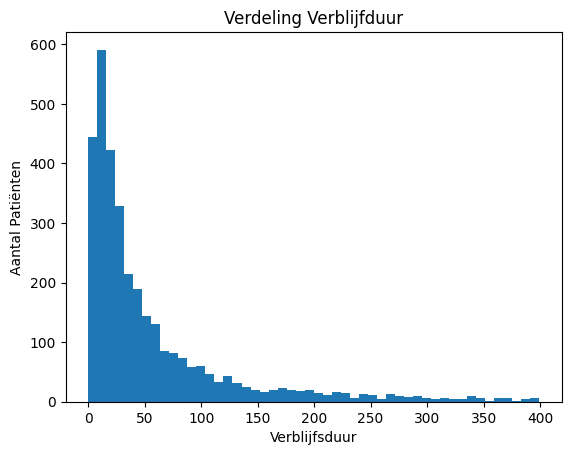

In [170]:
df400_hist = df400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verdeling Verblijfduur")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

In [171]:
print(f"{len(df400[df400['in_hosp_hr'] < 8])/3342*100}% van de patiënten had een verblijfsduur van korter dan 8 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 8) & (df400["in_hosp_hr"] < 16)])/3342*100) + "% van de patiënten had een verblijfduur van 8 tot 16 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 16) & (df400["in_hosp_hr"] < 24)])/3342*100) + "% van de patiënten had een verblijfduur van 16 tot 24 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 24) & (df400["in_hosp_hr"] < 32)])/3342*100) + "% van de patiënten had een verblijfduur van 24 tot 32 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 32) & (df400["in_hosp_hr"] < 40)])/3342*100) + "% van de patiënten had een verblijfduur van 32 tot 40 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 40) & (df400["in_hosp_hr"] < 48)])/3342*100) + "% van de patiënten had een verblijfduur van 40 tot 48 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 48) & (df400["in_hosp_hr"] < 64)])/3342*100) + "% van de patiënten had een verblijfduur van 48 tot 64 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 64) & (df400["in_hosp_hr"] < 96)])/3342*100) + "% van de patiënten had een verblijfduur van 64 tot 96 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 96) & (df400["in_hosp_hr"] < 200)])/3342*100) + "% van de patiënten had een verblijfduur van 96 tot 200 uur.")
print(str(len(df400[(df400['in_hosp_hr'] >= 200) & (df400["in_hosp_hr"] < 400)])/3342*100) + "% van de patiënten had een verblijfduur van 200 tot 400 uur.")

13.22561340514662% van de patiënten had een verblijfsduur van korter dan 8 uur.
17.743865948533813% van de patiënten had een verblijfduur van 8 tot 16 uur.
12.687013764213045% van de patiënten had een verblijfduur van 16 tot 24 uur.
9.90424895272292% van de patiënten had een verblijfduur van 24 tot 32 uur.
6.343506882106523% van de patiënten had een verblijfduur van 32 tot 40 uur.
5.715140634350688% van de patiënten had een verblijfduur van 40 tot 48 uur.
8.19868342309994% van de patiënten had een verblijfduur van 48 tot 64 uur.
8.946738479952124% van de patiënten had een verblijfduur van 64 tot 96 uur.
11.220825852782765% van de patiënten had een verblijfduur van 96 tot 200 uur.
6.014362657091562% van de patiënten had een verblijfduur van 200 tot 400 uur.


We willen graag per afdeling de verbljifsduur bekijken, om te zien of we deze los moeten voorspellen. Eerst maken we hier losse dataframes per afdeling voor, door alle rijen te pakken met die afdeling uit ons dataframe met de verblijfsduren tot 400 uur.

In [172]:
capu400 = df400[df400["afdeling"] == "CAPU"]
card400 = df400[df400["afdeling"] == "CARD"]
chir400 = df400[df400["afdeling"] == "CHIR"]
int400 = df400[df400["afdeling"] == "INT"]
nec400 = df400[df400["afdeling"] == "NEC"]
neu400 = df400[df400["afdeling"] == "NEU"]
other400 = df400[df400["afdeling"] == "OTHER"]
print(capu400.shape)
print(card400.shape)
print(chir400.shape)
print(int400.shape)
print(nec400.shape)
print(neu400.shape)
print(other400.shape)

(1225, 12)
(249, 12)
(411, 12)
(816, 12)
(252, 12)
(340, 12)
(49, 12)


Text(0, 0.5, 'Aantal Patiënten')

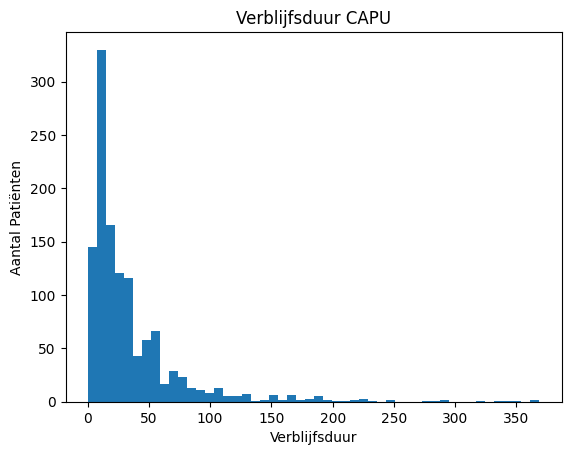

In [173]:
capu400_hist = capu400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur CAPU")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

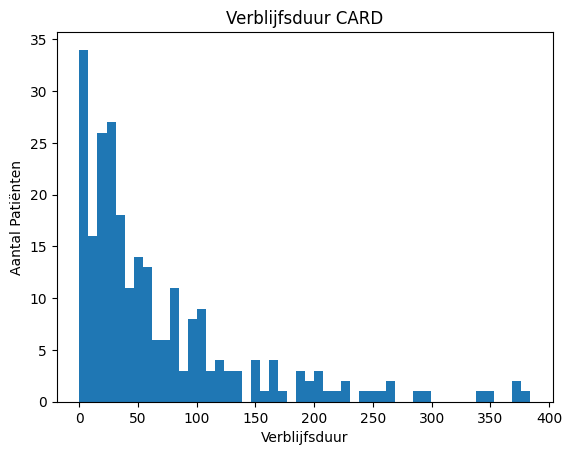

In [174]:
card400_hist = card400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur CARD")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

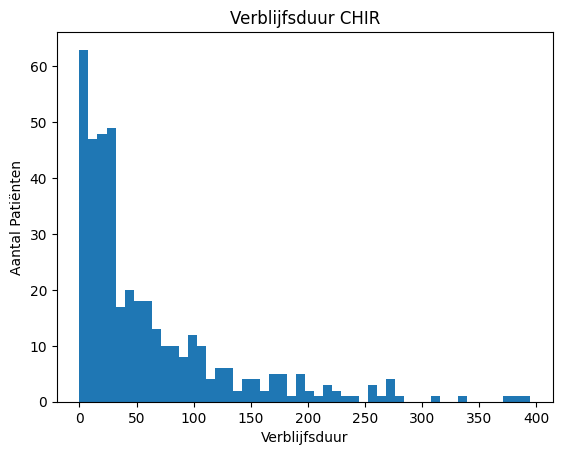

In [175]:
chir400_hist = chir400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur CHIR")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

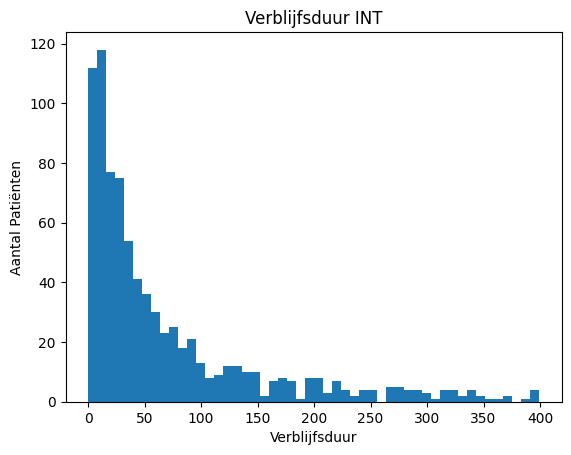

In [176]:
int400_hist = int400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur INT")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

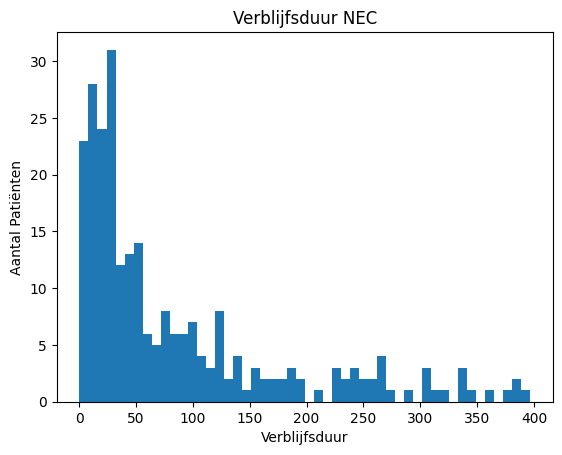

In [177]:
nec400_hist = nec400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur NEC")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

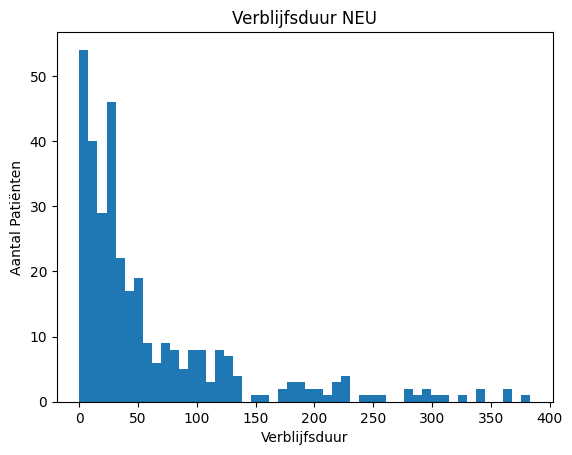

In [178]:
neu400_hist = neu400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur NEU")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

Text(0, 0.5, 'Aantal Patiënten')

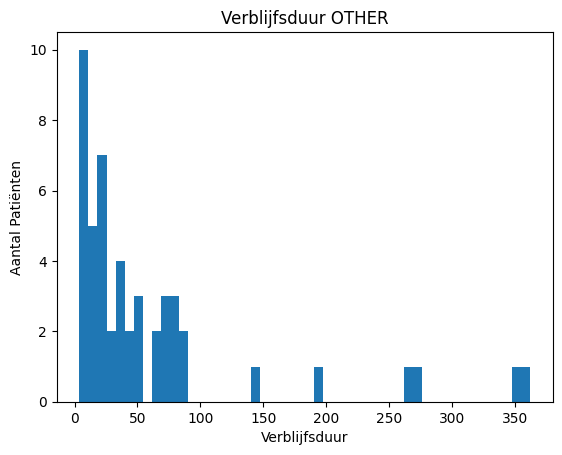

In [179]:
other400_hist = other400.hist(column = "in_hosp_hr", grid=False, bins=50)
pl.title("Verblijfsduur OTHER")
pl.xlabel("Verblijfsduur")
pl.ylabel("Aantal Patiënten")

We kunnen zien dat de verdelingen per afdeling niet genoeg verschillen om per afdeling los de verblijfsduur te gaan voorspellen.

Om patiënten aan te maken in het model moeten we eerst weten hoeveel patiënten er per week bijkomen. Dit berekenen we door het totaal aantal patiënten (3815) te delen door het aantal weken in de data.

In [180]:
df3.sort_values(["adm_icu"])

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0            1.0 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1            2.0 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2            3.0 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3            4.0 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4            5.0 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   
...          ...                 ...                 ...     ...      ...   
3695         NaN 2017-12-01 00:00:00                 NaT   False      NEC   
3728         NaN 2017-12-02 00:00:00                 NaT   False      INT   
3744         NaN 2017-12-03 00:00:00                 NaT   False     CHIR   
3763         NaN 2017-12-04 00:00:00                 NaT   False      INT   
3795         NaN 2017-12-05 00:00:00                 NaT   False     CHIR   

      sub_ic     sub_ic_text         in_hosp  in_hosp_hr  starthour  \
0        4.0         NEC/NEU 1 days 09:07:00   33.116667        7.0   
1        2.0  CARD/INT/OTHER 0 days 05:23:01    5.383611       14.0   
2        2.0  CARD/INT/OTHER 0 days 22:39:00   22.650000       20.0   
3        1.0            CAPU 0 days 22:36:00   22.600000       12.0   
4        4.0         NEC/NEU 0 days 20:50:59   20.849722       13.0   
...      ...             ...             ...         ...        ...   
3695     NaN             NaN             NaT         NaN        NaN   
3728     NaN             NaN             NaT         NaN        NaN   
3744     NaN             NaN             NaT         NaN        NaN   
3763     NaN             NaN             NaT         NaN        NaN   
3795     NaN             NaN             NaT         NaN        NaN   

      geweigerd weekday_name  
0         False     Thursday  
1         False     Thursday  
2         False     Thursday  
3         False       Friday  
4         False       Friday  
...         ...          ...  
3695       True       Friday  
3728       True     Saturday  
3744       True       Sunday  
3763       True       Monday  
3795       True      Tuesday  

[3815 rows x 12 columns]

De laatste datum in het dataframe is 5 december 2017, en de eerste is 1 januari 2015. Het verschil hiertussen is precies 153 weken. We verwachten dus 3815 / 153 = 24.9346405229 patiënten per week gemiddeld. Voor het gemak pakken we 25 patiënten per week. Onze week heeft 21 delen van 8 uur, waarin dus ongeveer 25 patiënten zouden aankomen. We kunnen dus bij elke stap sowieso een patiënt aanmaken, met 4/21 kans op een tweede patiënt, oftewel ~19%.

In [181]:
df3["adm_icu"]
df3.head()

Unnamed: 0             adm_icu        dis_date_icu planned afdeling  \
0         1.0 2015-01-01 07:36:00 2015-01-02 16:43:00   False      NEC   
1         2.0 2015-01-01 14:23:59 2015-01-01 19:47:00   False      INT   
2         3.0 2015-01-01 20:30:59 2015-01-02 19:09:59   False      INT   
3         4.0 2015-01-02 12:56:00 2015-01-03 11:32:00    True     CAPU   
4         5.0 2015-01-02 13:12:00 2015-01-03 10:02:59   False      NEC   

   sub_ic     sub_ic_text         in_hosp  in_hosp_hr  starthour  geweigerd  \
0     4.0         NEC/NEU 1 days 09:07:00   33.116667        7.0      False   
1     2.0  CARD/INT/OTHER 0 days 05:23:01    5.383611       14.0      False   
2     2.0  CARD/INT/OTHER 0 days 22:39:00   22.650000       20.0      False   
3     1.0            CAPU 0 days 22:36:00   22.600000       12.0      False   
4     4.0         NEC/NEU 0 days 20:50:59   20.849722       13.0      False   

  weekday_name  
0     Thursday  
1     Thursday  
2     Thursday  
3       Friday  
4       Friday

In [182]:
from datetime import timedelta
x = df3["adm_icu"][0] + timedelta(days=30)
x

Timestamp('2015-01-31 07:36:00')

In [183]:
print(len(df3[df3['adm_icu'].dt.strftime('%Y') == "2015"]))
print(len(df3[df3['adm_icu'].dt.strftime('%Y') == "2016"]))
print(len(df3[df3['adm_icu'].dt.strftime('%Y') == "2017"]))

1591
2098
126


In [184]:
start = df3["adm_icu"][0]
end = df3["adm_icu"][len(df3)-1]
print(start)
print(end)

2015-01-01 07:36:00
2017-07-06 00:00:00


In [185]:
end - start

Timedelta('916 days 16:24:00')

In [186]:
df3[df3['adm_icu'].dt.strftime('%Y-%m-%d') == "2016-09-03"]

Unnamed: 0             adm_icu dis_date_icu planned afdeling  sub_ic  \
2802      3807.0 2016-09-03 12:56:00   2016-10-08   False      NEU     4.0   
2803      3809.0 2016-09-03 15:17:59   2016-09-04   False      NEU     4.0   
2804      3810.0 2016-09-03 20:10:00   2016-09-07   False      INT     2.0   
2805      3811.0 2016-09-03 22:32:59   2016-09-14   False      INT     2.0   
3615         NaN 2016-09-03 00:00:00          NaT   False     CHIR     NaN   
3616         NaN 2016-09-03 00:00:00          NaT   False      NEC     NaN   
3617         NaN 2016-09-03 00:00:00          NaT   False      NEU     NaN   

         sub_ic_text          in_hosp  in_hosp_hr  starthour  geweigerd  \
2802         NEC/NEU 34 days 11:04:00  827.066667       12.0      False   
2803         NEC/NEU  0 days 08:42:01    8.700278       15.0      False   
2804  CARD/INT/OTHER  3 days 03:50:00   75.833333       20.0      False   
2805  CARD/INT/OTHER 10 days 01:27:01  241.450278       22.0      False   
3615             NaN              NaT         NaN        NaN       True   
3616             NaN              NaT         NaN        NaN       True   
3617             NaN              NaT         NaN        NaN       True   

     weekday_name  
2802     Saturday  
2803     Saturday  
2804     Saturday  
2805     Saturday  
3615     Saturday  
3616     Saturday  
3617     Saturday

In [187]:
aantallen = []
for i in range(918):
    x = timedelta(days=i)
    y = df3["adm_icu"][0] + x
    dag = y.strftime('%Y-%m-%d')
    aantallen.append(len(df3[df3['adm_icu'].dt.strftime('%Y-%m-%d') == f"{dag}"]))
    
print(len(df3[df3['adm_icu'].dt.strftime('%Y-%m-%d') == f"{dag}"]))

1


In [234]:
nacht = df3[(df3['adm_icu'].dt.strftime('%H:%M') >= "00:00") & (df3['adm_icu'].dt.strftime('%H:%M') <= "06:00")] 

In [235]:
ochtend = df3[(df3['adm_icu'].dt.strftime('%H:%M') > "06:00") & (df3['adm_icu'].dt.strftime('%H:%M') <= "12:00")] 

In [236]:
middag = df3[(df3['adm_icu'].dt.strftime('%H:%M') > "12:00") & (df3['adm_icu'].dt.strftime('%H:%M') <= "18:00")] 

In [237]:
avond = df3[(df3['adm_icu'].dt.strftime('%H:%M') > "18:00") & (df3['adm_icu'].dt.strftime('%H:%M') <= "23:59")]

In [246]:
tijden = [len(nacht)/ len(df3), len(ochtend)/ len(df3), len(middag)/ len(df3), len(avond)/ len(df3)]
print(tijden)
x = 0
for i in tijden:
    print(round(i, 3))
    x += round(i, 3)

print(x)

[0.20157273918741808, 0.10170380078636959, 0.45137614678899085, 0.2453473132372215]
0.202
0.102
0.451
0.245
1.0


In [191]:
maximaal = max(aantallen)
minimaal = min(aantallen)
print(maximaal, minimaal)
print(len(aantallen))

13 0
918


In [192]:
patienten_per_dag = {}
total_100 = 0
#
for i in range(maximaal + 1):
    x = aantallen.count(i)
    y = x / len(aantallen)
    patienten_per_dag[i] = y
    total_100 += y

print(total_100)
patienten_per_dag

1.0


{0: 0.1775599128540305,
 1: 0.06318082788671024,
 2: 0.09694989106753812,
 3: 0.08714596949891068,
 4: 0.11220043572984749,
 5: 0.1111111111111111,
 6: 0.11982570806100218,
 7: 0.08823529411764706,
 8: 0.07407407407407407,
 9: 0.0392156862745098,
 10: 0.015250544662309368,
 11: 0.007625272331154684,
 12: 0.0054466230936819175,
 13: 0.002178649237472767}

In [193]:
i = 0
for key, value in patienten_per_dag.items():
    i += key * value
print(i)

4.135076252723311
